In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras.models as tfm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

In [4]:
def ResNet50 (input_shape , num_of_labels):
    model = tfm.Sequential()

    model.add(tfl.Conv2D(64, (7, 7),activation='relu', padding='same', input_shape=input_shape ,  strides = 2))
    model.add(tfl.MaxPool2D((3,3) , strides = 2))


    blocks = [3,4,6,3]

    filters = np.array([
    [64, 64, 256],
    [128, 128, 512],
    [256, 256, 1024],
    [512, 512, 2048]
    ])

    filtersize =[1, 3, 1]
    for stage in range(4):
        for i in range (blocks[stage]):
            for j in range (3):
                model.add(tfl.Conv2D(filters[stage , j], (filtersize[j] , filtersize[j]) ,activation='relu', padding='same'))
                model.add(tfl.BatchNormalization())
    model.add(tfl.GlobalAveragePooling2D())
    model.add(tfl.Flatten())

    model.add(tfl.Dense(1000 , activation='relu'))

    model.add(tfl.Dense(num_of_labels , activation='softmax'))

    return model


In [5]:
Res_model = ResNet50(input_shape=x_train[0].shape , num_of_labels=len(np.unique(y_train)))
Res_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
Res_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          4160      
                                                                 
 batch_normalization (Batch  (None, 6, 6, 64)          256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 batch_normalization_1 (Bat  (None, 6, 6, 64)          2

In [6]:
Res_model.fit(x_train, y_train, epochs=10  ,batch_size=64  , validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 148s 107ms/step - loss: 0.9468 - accuracy: 0.6730 - val_loss: 1.2730 - val_accuracy: 0.7135
Epoch 2/10
938/938 [==============================] - 100s 107ms/step - loss: 0.2309 - accuracy: 0.9327 - val_loss: 0.2597 - val_accuracy: 0.9379
Epoch 3/10
938/938 [==============================] - 100s 107ms/step - loss: 0.1474 - accuracy: 0.9592 - val_loss: 0.2609 - val_accuracy: 0.9378
Epoch 4/10
938/938 [==============================] - 100s 107ms/step - loss: 0.1113 - accuracy: 0.9691 - val_loss: 0.3214 - val_accuracy: 0.9256
Epoch 5/10
938/938 [==============================] - 100s 107ms/step - loss: 0.0991 - accuracy: 0.9737 - val_loss: 0.2281 - val_accuracy: 0.9369
Epoch 6/10
938/938 [==============================] - 100s 107ms/step - loss: 0.0936 - accuracy: 0.9758 - val_loss: 0.1346 - val_accuracy: 0.9662
Epoch 7/10
938/938 [==============================] - 100s 107ms/step - loss: 0.0852 - accuracy: 0.9777 - val_loss: 0.1109 -

313/313 [==============================] - 6s 17ms/step


<Axes: >

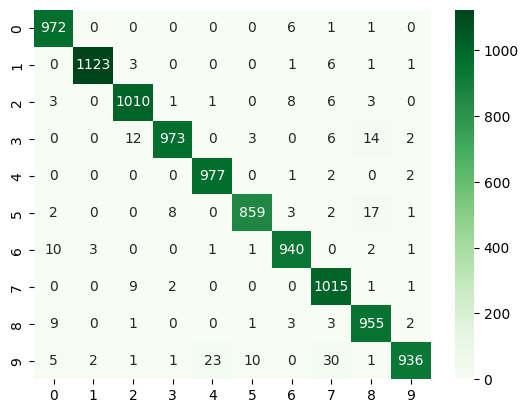

In [7]:
y_test_pred_res = np.argmax(Res_model.predict(x_test) , axis=1)
convmat_res = confusion_matrix(y_test , y_test_pred_res)
sns.heatmap(convmat_res , annot=True , fmt='d',cmap = 'Greens')

In [8]:
print(classification_report(y_test , y_test_pred_res))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.96      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.95      0.99      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.93      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

